<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCE4B-60-M  Cyber Security Research Paper

## Investigating The Performance of Spiking Neural Networks in Intrusion Detection On 5G Networks
## Baffour Sarkodie-Mensah (21049606)

  
***

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import os, sys
import glob as glob
import binascii
import csv
import pickle
from scapy.all import *
from pathlib import Path
from tqdm.auto import tqdm

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set Directories for Data Categories - Normal-1UE, Normal-2UE and Attacks.

In [4]:
pathToNormal = './Normal-1UE/'
pathToNormal2UE = './Normal-2UE/'
pathToAttack = './Attacks/'

#Create new directory for processed data
# !mkdir NEW-PREPPED-DATA_jupyter
processedPath = './NEW-PREPPED-DATA/'

# Exploratory Analyis of Data

In [5]:
example = rdpcap(pathToAttack+'AMFLookingForUDM/allcap_AMFLookingForUDM_00001_20220609151247.pcapng')

In [6]:
example[6].show()

###[ Ethernet ]### 
  dst       = 00:00:00:00:00:00
  src       = 00:00:00:00:00:00
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 197
     id        = 22163
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0xe594
     src       = 127.0.0.1
     dst       = 127.0.0.10
     \options   \
###[ TCP ]### 
        sport     = 37364
        dport     = 8000
        seq       = 3683835274
        ack       = 4293697932
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 512
        chksum    = 0xfec2
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (3708803956, 3529532140))]
###[ Raw ]### 
           load      = 'GET /nnrf-disc/v1/nf-instances?requester-nf-type=AMF&target-nf-type=UDM HTTP/1.1\r\nHost: 127.0.0.10:8000\r\nUser-Agent: curl/7.68.0\r\nAccept: */*\r\n\r\n'



# Data Pre-Processing

<strong> Normal-1UE Data </strong>

Combine all .pcapng files in Normal-1UE directory, convert to hex and save to CSV with corresponding label

In [6]:
datasets = glob(pathToNormal+'allcap*.pcapng')
print(datasets)
payloads = []
for file in tqdm(datasets):
    pcap = sniff(offline=str(file))
    for packet in pcap:
        if not Raw in packet:
            continue
        payload = binascii.hexlify(packet[Raw].original)
        payloads.append(payload)
print(len(payloads))

['./Normal-1UE\\allcap_00001_20220606102554.pcapng', './Normal-1UE\\allcap_00001_20220606131007.pcapng', './Normal-1UE\\allcap_00005_20220607051008.pcapng', './Normal-1UE\\allcap_00006_20220607091008.pcapng']


100%|██████████| 4/4 [1:00:23<00:00, 905.88s/it]


3564315


In [9]:
data = {'raw':payloads}
df = pd.DataFrame(data=data).sample(frac=1).reset_index(drop=True)
df.loc[:,'label'] = 'normal'
df.to_csv(f"{processedPath}normal_data.csv", index=False)
print(df.head(5))

                                                 raw   label
0  b'34ff00620000000100000085010009004500005a3515...  normal
1  b'34ff0580000000010000008501100900450005781fc5...  normal
2  b'34ff01e7000000010000008501000900450001df8d54...  normal
3  b'61c5c47601e79ac341bbaaef57ab36ab249ff032749f...  normal
4  b'34ff00420000000100000085010009004560003a0000...  normal


<strong> Normal-2UE Data </strong>

Combine all .pcapng files in Normal-2UE directory, convert to hex and save to CSV with corresponding label

In [10]:
#Close tqdm instances:
while len(tqdm._instances) > 0:
    tqdm._instances.pop().close()
print("Made it past clearing instances")

Made it past clearing instances


In [11]:
datasets = glob(pathToNormal2UE+'allcap*.pcapng')
payloads = []
for pcap in datasets:
    pcap = sniff(offline=str(file))
    for packet in pcap:
        if not Raw in packet:
            continue
        payload = binascii.hexlify(packet[Raw].original)
        payloads.append(payload)
print(len(payloads))

282234


In [13]:
data = {'raw':payloads,'label':['normal']*len(payloads)}
df = pd.DataFrame(data=data).sample(frac=1).reset_index(drop=True)
df.to_csv(f"{processedPath}normal_data_2ue.csv", index=False)

<strong> Malicious Data </strong>

In [14]:
#List all sub-directories in Attack folder
print(os.listdir(pathToAttack))

['AMFLookingForUDM', 'automatedDropWithTimer', 'automatedRedirectWithTimer', 'CrashNRF', 'FakeAMFDelete', 'FakeAMFInsert', 'GetAllNFs', 'GetUserData', 'randomAMFInsert', 'randomDataDump', 'README.md']


For every sub-directory, combine all .pcapng files, convert to hex and save to CSV with corresponding label

In [35]:
sets = []

#Select index of attack category. Repeat this process for all attack classes
i = os.listdir(pathToAttack)[9]

dataset = glob(pathToAttack+i+'/Attacks*.pcapng')

#Append all .pcapng files in attack folder into one
try:
    sets.append(str(dataset[0]))
except:
    print("Failed to find 'Attacks*.pcapng' file in folder: ", str(pathToAttack+i))  
print(sets)

#Convert combined packets into Hex format
payloads = []
for file in sets:
    pcap = sniff(offline=str(file))
    for packet in pcap[Raw]:
        if not Raw in packet:
            continue
        payload = binascii.hexlify(packet[Raw].original)
        payloads.append(payload)
    # print(file,len(payloads)
print(len(payloads))

['../Attacks/randomDataDump\\Attacks_randomDataDump.pcapng']
397


Save Hex data as CSV with the attack label

In [36]:
data = {'raw':payloads}
df = pd.DataFrame(data=data)

# Give hex data a label according to class name
df.loc[:,'label'] = 'randomdatadump'

# Save data to CSV file
df.to_csv(f"{processedPath}randomdatadump.csv", index=False)

try:
    del dataset, payload, payloads, data, df
except:
    pass

# Demonstrate Packet-Hex Conversion Validity

In [15]:
#Function to Convert from Hex format
def convertHex(hex_data):
    if len(hex_data) % 2 != 0:
        hex_data = '0' + hex_data

    ascii_data = binascii.unhexlify(hex_data)
    ascii_data_string = ascii_data.decode("utf-8")

    return ascii_data_string

In [16]:
hex_data = b'474554202f6e6e72662d646973632f76312f6e662d696e7374616e6365733f7265717565737465722d6e662d747970653d414d46267461726765742d6e662d747970653d55444d20485454502f312e310d0a486f73743a203132372e302e302e31303a383030300d0a557365722d4167656e743a206375726c2f372e36382e300d0a4163636570743a202a2f2a0d0a0d0a'
hex_data_string = hex_data.decode("utf-8")

convertHex(hex_data_string)

'GET /nnrf-disc/v1/nf-instances?requester-nf-type=AMF&target-nf-type=UDM HTTP/1.1\r\nHost: 127.0.0.10:8000\r\nUser-Agent: curl/7.68.0\r\nAccept: */*\r\n\r\n'

## Processing CSVs

In [17]:
normal = pd.read_csv(f"{processedPath}normal_data.csv")
normal2UE = pd.read_csv(f"{processedPath}normal_data_2ue.csv")

# malicious_multiclass.csv is a merged file from all attack file CSV files
malicious = pd.read_csv(f"{processedPath}malicious_multiclass.csv")

In [18]:
print('Normal: ')
normal.head(4)

Normal: 


,raw,label
0,b'34ff00620000000100000085010009004500005a3515...,normal
1,b'34ff0580000000010000008501100900450005781fc5...,normal
2,b'34ff01e7000000010000008501000900450001df8d54...,normal
3,b'61c5c47601e79ac341bbaaef57ab36ab249ff032749f...,normal


In [19]:
print('Normal-2UE: ')
normal2UE.head()

Normal-2UE: 


,raw,label
0,b'5cb716f11e499a4c82a500dcfdecbb13ee0859b6368d...,normal
1,b'17030301a7a85dd6eff26b2b3bc9b2a2c097f5d8b70b...,normal
2,b'1703030050000000000000028e2f5e807a9eb35783c8...,normal
3,b'34ff0041000000010000008501000900456000390000...,normal
4,b'17030301a6dd77245f39742f61c1612c0705077072ba...,normal


In [20]:
print('Malicious: ')
malicious.head(4)

Malicious: 


,raw,label
0,b'474554202f6e6e72662d646973632f76312f6e662d69...,amflookingforudm
1,b'474554202f6e6e72662d646973632f76312f6e662d69...,amflookingforudm
2,b'474554202f6e6e72662d646973632f76312f6e662d69...,amflookingforudm
3,b'474554202f6e6e72662d646973632f76312f6e662d69...,amflookingforudm



Check Data Shapes

In [21]:
print(f'Normal size: {normal.shape}')
print(f'Normal2UE size: {normal2UE.shape}')
print(f'Malicious size: {malicious.shape}')

Normal size: (3564315, 2)
Normal2UE size: (282234, 2)
Malicious size: (24174, 2)


Create a 50/50 split of normal/attack data. The malicious set is significantly smaller than either of the normal sets. Therefore, we use all of malicious data and half as many samples each for Normal-1UE and Normal-2UE

In [22]:
mixed = malicious.sample(frac=1,random_state=100) #take all the malicious
mixed = pd.concat([mixed, normal.sample(frac=1,random_state=100)[0:len(malicious)//2]]) #append the first {half the length of malicious} packets from normal-1ue
mixed = pd.concat([mixed, normal2UE.sample(frac=1,random_state=100)[0:len(malicious)//2]]) #append the first {half the length of malicious} packets from normal-2ue
mixed = mixed.sample(frac=1,random_state=1) #shuffle the data before processing

## Separate the labels (important for using the mixed data to evaluate an autoencoder)
mixed_labels = mixed.pop('label')
np.save(f'mixed_labels.npy',mixed_labels)
del mixed_labels

print('Packets in malicious: ',len(malicious))
print('Packets in mixed: ',len(mixed))
print('Mixed set is of the expected size: ',len(malicious)*2==len(mixed))

Packets in malicious:  24174
Packets in mixed:  48348
Mixed set is of the expected size:  True


In [23]:
# Display mixed sample dataframe
mixed

,raw
2285915,b'170303002230713a205b7c2601cfa4242f9bf59f3815...
2426807,b'4a145d96aca173362a72b3eb873b97c9e1a016253aba...
1215972,b'43787991f60752f65174c8b9905e1ea09c50605a07ec...
249928,b'170303020f6a53396b815466a5a4cd238fcdda79bd66...
2489173,b'34ff0030000000010000008501100900450000282346...
...,...
151711,b'545212b6341223a74877d8733de7247a5d047d3f1bdf...
2471556,b'34ff02a0000000010000008501100900450002984c00...
18856,b'485454502f312e312032303120437265617465640d0a...
11664,b'ec000000e210000000000000dd0700000000000000d7...


Normalize the packet lengths and reshape each packet's string of bytes to an array of bytes
The length of the payloads can vary widely, from a few bytes to several thousand bytes. Hence it is helpful to
    - normalize the payload length, append zeros to the ends of packets shorter than the desired size and truncate longer packets to the desired size
    - convert from byte string to byte array, we use the numpy function `frombuffer`

In [24]:
# Declare the desired, normalized size for the packets:
max_packet_length = 1024

In [25]:
def ReshapePackets(dataFrame, saveToFilename, max_packet_length, reshape=False):
    '''Converts from byte strings in a DataFrame to a numpy array of bytes'''
    array = np.array(dataFrame['raw'])
    array = np.ascontiguousarray(array)
    payloads = []
    array.shape
    for i in range(array.shape[0]):
#         print(array[i])
        # Standardize the length of the strings:
        payloadStr = array[i].split('\'')[1]
        payloadStr = payloadStr.ljust(max_packet_length+2, u'0')
        payloadStr = payloadStr[0:max_packet_length]
        array[i] = payloadStr.encode('utf8')
        # Convert to array:
        array[i] = np.frombuffer(array[i],dtype=np.uint8,count=max_packet_length)
        if(reshape==True):
            payloads.append(np.reshape(array[i],(array[i].shape[0],1,1)))
        else:
            payloads.append(array[i])
    payloads = np.array(payloads)
    print('New data shape: ',payloads.shape)
    np.save(saveToFilename,payloads)

Normalize and reshape the mixed data

In [26]:
ReshapePackets(mixed,f'mixed.npy',max_packet_length)

New data shape:  (48348, 1024)


Create a 50/50 split of the two types of normal data

In [27]:
totalNormal = pd.concat([normal.sample(frac=1,random_state=2022),
                         normal2UE.sample(frac=1,random_state=100)[0:len(normal)]
                         ])
totalNormal = totalNormal.sample(frac=1,random_state=2022)
ReshapePackets(normal,f'{processedPath}normal.npy',max_packet_length)
# del normal
ReshapePackets(normal2UE,f'{processedPath}normal2UE.npy',max_packet_length)
# del normal2UE
ReshapePackets(totalNormal,f'{processedPath}total_normal.npy',max_packet_length)
# del totalNormal

New data shape:  (3564315, 1024)
New data shape:  (282234, 1024)
New data shape:  (3846549, 1024)


In [28]:
mixed = np.load(f'mixed.npy',allow_pickle=True)
labels = np.load(f'mixed_labels.npy',allow_pickle=True)
print(mixed[0:5][1])
print(labels[0:5])

[52 97 49 ... 51 49 52]
['normal' 'normal' 'normal' 'normal' 'normal']


In [29]:
unique_classes = np.unique(labels)
num_classes = len(unique_classes)

# Print the number of classes
print("Number of classes:", unique_classes)

Number of classes: ['amflookingforudm' 'automatedDropWithTimer' 'automatedRedirectWithTimer'
 'crashNRF' 'fakeamfdelete' 'fakeamfinsert' 'getallnfs' 'getuserdata'
 'normal' 'randomamfinsert' 'randomdatadump']


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Define function to plot confusion matrix
def plotMatrix(matrix, classnames):
    matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=classnames)
    fig, ax = plt.subplots(figsize=(15,8))
    matrix_display.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(classnames, rotation=45, ha='right')
    ax.set_yticklabels(classnames, rotation=0, va='center')
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


#Encode Family Names
labelEncode = LabelEncoder()
labels_encoded = labelEncode.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mixed, labels_encoded, test_size=0.3, random_state=42)

# Enhanced Elman SNN Model

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import timeit

class ElmanSNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, threshold=1.0):
        super(ElmanSNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.hidden_to_output = nn.Linear(hidden_size, output_size)
        self.threshold = threshold

    def forward(self, input, hidden_state):
        combined = torch.cat((input, hidden_state), dim=1)
        hidden_activation = self.input_to_hidden(combined)
        hidden_spikes = self.spike_function(hidden_activation)
        output = self.hidden_to_output(hidden_spikes)
        return output, hidden_spikes

    def spike_function(self, x):
        spikes = torch.zeros_like(x)
        spikes[x >= self.threshold] = 1.0
        return spikes

# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    

# Create data loaders for training and testing
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up the SNN model
input_size = mixed.shape[1]  # Assuming the features are in the second dimension
hidden_size = 64
output_size = 12
snn = ElmanSNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(snn.parameters(), lr=0.001)

# Training loop
num_epochs = 10

# Start timer
starttime = timeit.default_timer()

for epoch in range(num_epochs):
    snn.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        hidden = torch.zeros(inputs.size(0), hidden_size)
        outputs, hidden = snn(inputs, hidden)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # Evaluate the model
    snn.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        all_labels = []
        all_predicted = []

        for inputs, labels in test_loader:
            hidden = torch.zeros(inputs.size(0), hidden_size)
            outputs, _ = snn(inputs, hidden)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.tolist())
            all_predicted.extend(predicted.tolist())
    #         total_correct += (predicted == labels).sum().item()
    #         total_samples += labels.size(0)
    
    # accuracy = total_correct / total_samples
    # print(f"Epoch {epoch+1}/{num_epochs}, Test Accuracy: {accuracy}")

print("Training & Evaluation time :", timeit.default_timer() - starttime)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted', labels=all_predicted)
recall = recall_score(all_labels, all_predicted, average='weighted', labels=all_predicted)
f1 = f1_score(all_labels, all_predicted,average='weighted', labels=all_predicted)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-sccore:", f1)

Training & Evaluation time : 13.759378999999853
Accuracy: 0.8175801447776628
Precision: 0.8320526879937025
Recall: 0.830959456682914
F1-sccore: 0.8313814685170787


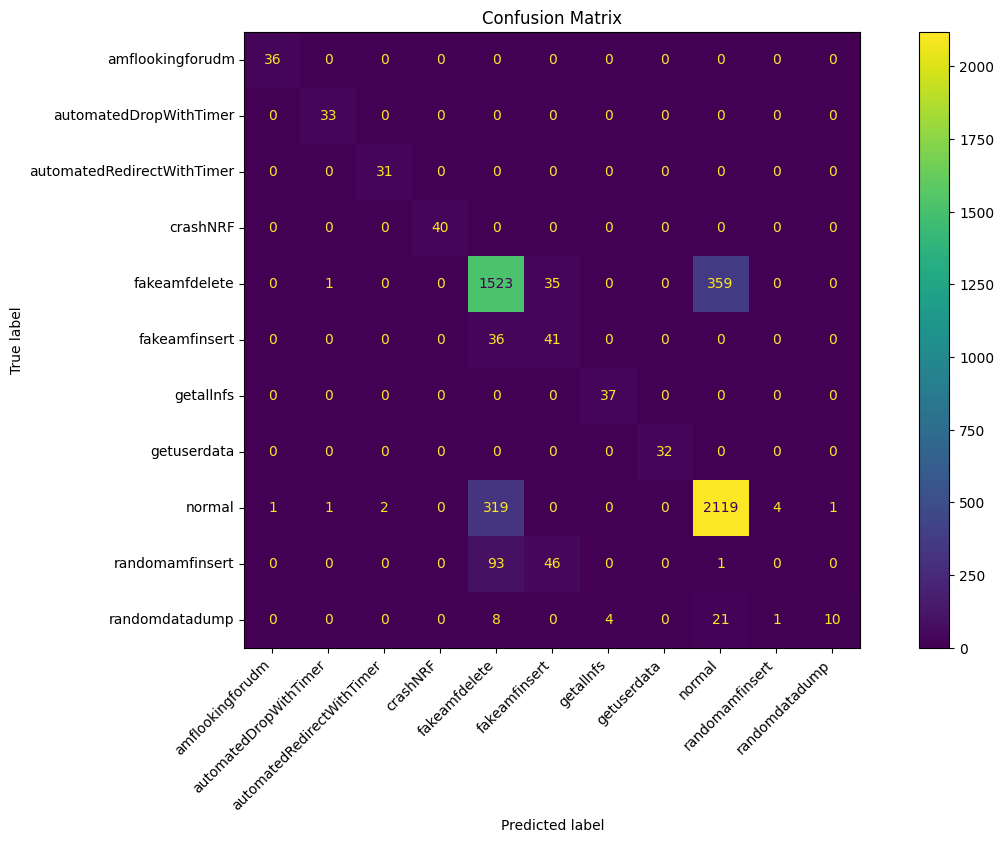

In [66]:
matrix = confusion_matrix(y_test, all_predicted)
plotMatrix(matrix, unique_classes)

# LSTM RNN Model

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import StandardScaler
from keras_visualizer import visualizer
import timeit

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))  # Output layer with softmax activation for multi-class

# Visualize model
visualizer(model, file_format='png', view=True)

In [34]:
# Compile the model with "sparse_categorical_crossentropy" loss for multi-class problem
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data for RNN
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Start timer
starttime = timeit.default_timer()

# Train the model
model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

print("Training & Evaluation time :", timeit.default_timer() - starttime)

Epoch 1/10
1360/1360 [==============================] - 342s 250ms/step - loss: 1.0121 - accuracy: 0.5880 - val_loss: 0.9224 - val_accuracy: 0.6294
Epoch 2/10
1360/1360 [==============================] - 340s 250ms/step - loss: 0.5801 - accuracy: 0.8351 - val_loss: 0.3870 - val_accuracy: 0.8873
Epoch 3/10
1360/1360 [==============================] - 341s 251ms/step - loss: 0.3816 - accuracy: 0.8833 - val_loss: 0.3560 - val_accuracy: 0.8871
Epoch 4/10
1360/1360 [==============================] - 341s 251ms/step - loss: 0.3461 - accuracy: 0.8845 - val_loss: 0.3124 - val_accuracy: 0.8885
Epoch 5/10
1360/1360 [==============================] - 342s 252ms/step - loss: 0.3099 - accuracy: 0.8873 - val_loss: 0.3178 - val_accuracy: 0.8947
Epoch 6/10
1360/1360 [==============================] - 341s 251ms/step - loss: 0.2791 - accuracy: 0.8951 - val_loss: 0.2461 - val_accuracy: 0.9024
Epoch 7/10
1360/1360 [==============================] - 341s 251ms/step - loss: 0.2561 - accuracy: 0.9013 - val_

In [35]:
y_pred = model.predict(X_test_reshaped)

152/152 [==============================] - 12s 76ms/step


In [36]:
y_pred_labels = np.argmax(y_pred, axis=1)

precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-sccore:", f1)


c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.910872083552401
Recall: 0.9191313340227508
F1-sccore: 0.9120789549116785


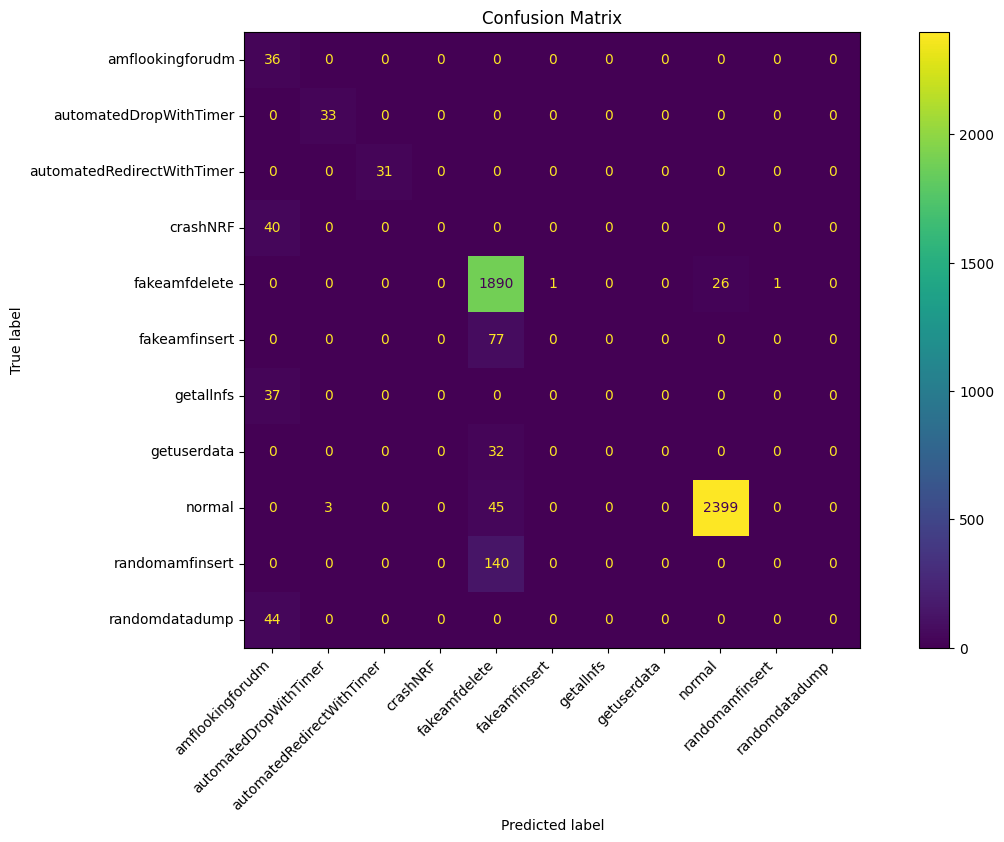

In [18]:
matrix = confusion_matrix(y_test, y_pred_labels)
plotMatrix(matrix, unique_classes)